In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api

Выгрузим данные

In [ ]:

df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Построим модель зависяющую от констанаты 1, т е у нас нет предикторорв и модель обучается на основе данных о зависимой переменной

In [ ]:
model = smf.glm(
    formula="survived ~ 1", data=df, family=statsmodels.api.families.Binomial()
).fit()
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Mon, 27 Jan 2025   Deviance:                       1186.7
Time:                        14:31:56   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.0

Кстати P >|z| <=> вероятность того, что intersept отличается так или более экстремально от 0

Мы получили Intercept, т е логарифм шансов пол успеха (выживаемости)

Но как мы его получили?

Посчитаем кол-во выживших и не выживших

In [ ]:
pivot_survived = pd.pivot_table(data=df, index='survived', values='pclass', aggfunc='count')
print(pivot_survived)

          pclass
survived        
0            549
1            342


Посчитаем вручную логарифм шансов

In [ ]:
print(np.log(342/549))

-0.4732877044469254


Это и есть наш intercept (они равны)

Другими словами мы говорим. Если в данные добавиться еще один человек, то с вероятнотью ln(p/1-p) = -0.473 <=> p=0.38 он выживет

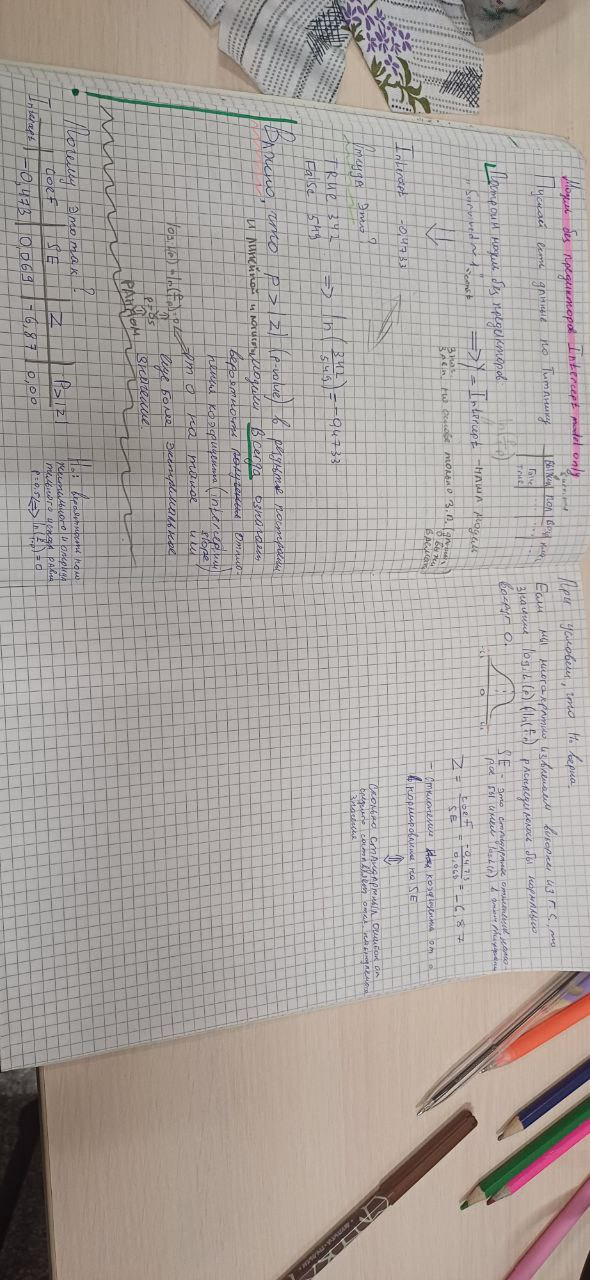